
## Visualización de dato con Python

### Librerías 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np 

### Carga del Pima Indians Diabetes Dataset 

Cargaremos el dataset que describe las características de un grupo poblacional afectado por la diabetes en un lugar de la India. 

In [ ]:
import urllib.request
from zipfile import ZipFile
import os 

def download(filename, url): 
  urllib.request.urlretrieve(url,filename)

import shutil
def unzip(filename):
  shutil.unpack_archive(filename, extract_dir="downloads")

In [ ]:
download("diabetes.zip", "https://drive.google.com/uc?export=download&id=194YGky0e0v0JtKxglJ0C1vX2JFjjRt4K")
unzip("diabetes.zip") 

### Metricas elementales. 
Gracias al método dataframe.describe(), podemos determinar algunas de las siguientes lecturas que; 
- la población de la muestra se compone de un total de 768 individuos. 
- El nivel promedio de glucosa en la sangre  para la muestra fue de 120.9 mg/dl
- la edad promedio de las población de la muestra fue de 32 años. 

Para ver si la distribución de los datos sirve como referencia estadística, vamos a graficar.


In [ ]:
data = pd.read_csv("/content/downloads/diabetes.csv")
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Como no contamos con una variable categórica añadiremos una nueva columna. Suponiendo que los resultados de la columna "outcome" sean asertados, la clasificación tratada como parte del ejemplo será la siguiente: 

 * Presenta diabetes: Y -> 1 
 * Presenta diabetes: N -> 0 

In [ ]:
lis = np.full([len(data)], np.NaN) # columna llena de Nulos 
srs = pd.Series(lis, name="diagnosis") # nueva columna para el dataframe
srs.head() # los primeros 5 elementos de Series. 

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: diagnosis, dtype: float64

Usando la funcionalidad np.where podemos asignar los valores condicionales a cada uno de las filas del dataframe. 

In [ ]:
data["diagnosis"] = srs # agregando la columna con los datos inicialiados en nulo 
data.head() # primeros cinco elementos del dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diagnosis
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


In [ ]:
# asignamos los valores categóricos a la nueva columna 
col = "Outcome"
condition = [data[col] == 0, data[col] == 1] 
choices = ["N","Y"] 
data["diagnosis"] = np.select(condition, choices, default=np.NaN)

In [ ]:
data["diagnosis"].unique() 

array(['Y', 'N'], dtype=object)

### Diagrama de barras 
Muestra la frecuencia con que se repite una determinada variable dentro de cada uno de los diversos grupos en los que se ha dividido un conjunto

Text(0, 0.5, 'Sample poblation')

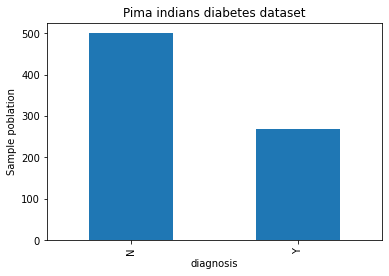

In [ ]:
dataAgrouped = data.groupby("diagnosis").count() 
dataAgrouped["Outcome"].plot(kind="bar")
plt.title("Pima indians diabetes dataset")
plt.ylabel("Sample poblation")

### Histogramas 
Vamos a ver la distribución de la población categorizada por si tienen o no diabetes. La lectura de los histogramas se hace pro rangos poblacionales. El rango poblacional este caso está relacionado a la edad, y se podrían generar las siguientes lecturas dependiendo de la cantidad de los rangos con los que se creo el histograma.

* De la muestra poblacional, al menos 150 se encuentran sanos (rango de 20 a 25 años más o menos)  
* 30 personas en edades entre 40 y 43 años presentan diabetes.

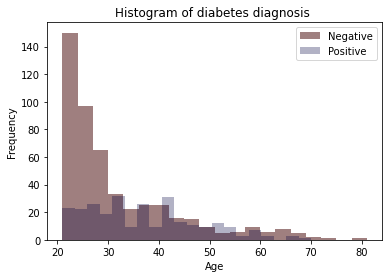

In [ ]:
n = plt.hist([data[data["diagnosis"] == "N"].Age],bins=20,fc = (0.25,0,0,0.5),label = "Negative")
y = plt.hist([data[data["diagnosis"] == "Y"].Age],bins=20,fc = (0,0,0.25,0.3),label = "Positive")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of diabetes diagnosis ")
plt.show()

In [ ]:
# el retorno de los plot.hist()  es y, x, _ 
# valores en el eje y, valores en el eje x, "barras"

frequent = y[0].max() # extremos el máximo valor de y para la parte de la población, que presentó diabetes. 
frequent = list(y[0]).index(frequent) # posición del máximo valor en Y 
most_frequent = y[1][frequent] # Ubicación de la edad correspondiente en X 
print("Most frequence age relationate for presence of diabetes:", "{:.2f}".format(most_frequent) )

Most frequence age relationate for presence of diabetes: 30.80


### Diagrama de cajas y bigotes. 
Aunque Pandas.dataframe.describe() nos muestra las métricas estadísitcas fundamentales del dataset, la mejor forma de comprender el comportamiento general de los datos es visualizándolo. 
El siguiente diagrama nos mostrará; el valor de la media, la mediana, El rango intercuartílico que es un medida de dispersión de un conjunto de datos que expresa la diferencia o la distancia entre el primer y el tercer cuartil - esto describe el rango en el cual están mayormente concentrados los datos -, y valores atípicos o extremos que pueden generar ruido o evidenciar la dispersión de los componentes del dataset. 

- Q1: el 25% de los valores son menores o igual a este valor.
- Q2 (Mediana): Divide en dos partes iguales la distribución. De forma que  el  50% de los valores son menores o igual a este valor. 
- Q3: el 75% de los valores son menores o igual a este valor.
- RIC: Diferencia entre el valor del tercer cuartil y el primer cuartil.

- Si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.
- Asimetría positiva (hacia la derecha o hacia arriba): Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana.
- Asimetría negativa (hacia la izquierda o hacia abajo). Los datos se concentran en la parte superior de la distribución. La media suele ser menor que la mediana.

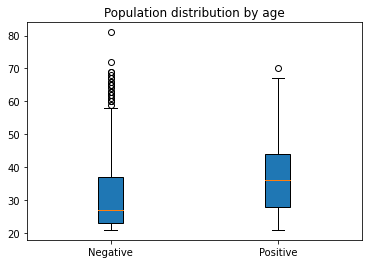

In [ ]:
dataAgrouped = [data[data["diagnosis"] == "N"].Age, data[data["diagnosis"] == "Y"].Age]
k = plt.boxplot(dataAgrouped,vert=True,patch_artist=True, labels=["Negative", "Positive"]);
plt.title("Population distribution by age");

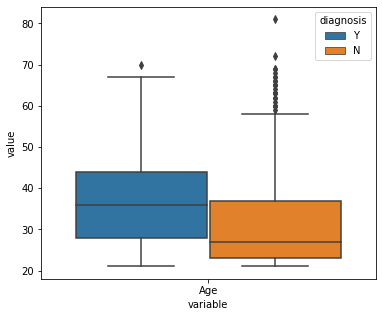

In [ ]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['Age'])
plt.figure(figsize = (6,5))
k = sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [ ]:
melted_data[melted_data["diagnosis"] == "Y"].describe() 

,value
count,268.000000
mean,37.067164
std,10.968254
min,21.000000
25%,28.000000
50%,36.000000
75%,44.000000
max,70.000000


In [ ]:
melted_data[melted_data["diagnosis"] == "N"].describe() 

,value
count,500.000000
mean,31.190000
std,11.667655
min,21.000000
25%,23.000000
50%,27.000000
75%,37.000000
max,81.000000


### Función de probabilidad acumulada  
[Otras funciones que pueden necesitarse](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/)


Se determina a partir de variable aleatoria real y de una distribución de probabilidad determinada, que devuelve la probabilidad de que la variable sea igual o menor que un valor concreto. 


Por ejemplo; 
La probabilidad de que la variable tome valores menores que x = 125 (Nivel de glucosa en la sangre) is 0,25. P(125 < x)

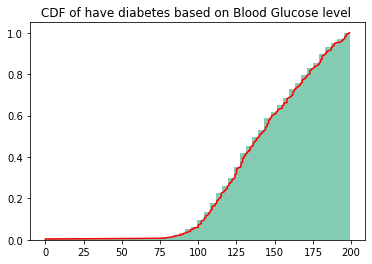

In [ ]:
GlucoseLevel = data[data['Outcome'] == 1].Glucose
plt.hist(GlucoseLevel ,bins=50,fc=(0.03,0.6,0.4,0.5),label='Blood Glucose level',cumulative = True, density=True )
sorted_data = np.sort(GlucoseLevel)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y,color='red')
plt.title('CDF of have diabetes based on Blood Glucose level ')
plt.show()


Los gráficos KDE - Estimación de densidad de núcleo bivariable - Permiten determinar cómo se comportan las variables en conjunto. Si solo existe un núcleo se puede decir que las variables tienen un comportamiento monomodal, de lo contrario serán bimodales o multimodales - poco frecuente -. Los núcleos determinan las zonas concéntricas hacia las cuales tienden los datos, es decir, en donde se encuentra la mayoría de ellos. Un gráfica poco uniforme y con varios núcleos expresa una relación débil - o de dispersión alta entre las mismas variables -. Es otro tipo de función de probabilidad acumulada, que sirve para estimar el valor de una variable aleatoria. 

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

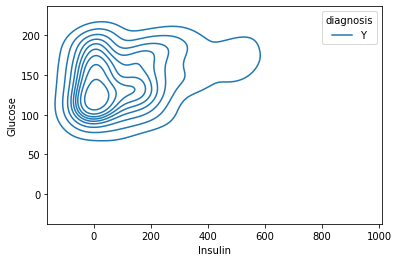

In [ ]:
sns.kdeplot(data=data[data['Outcome'] == 1], x="Insulin", y="Glucose", hue="diagnosis")

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

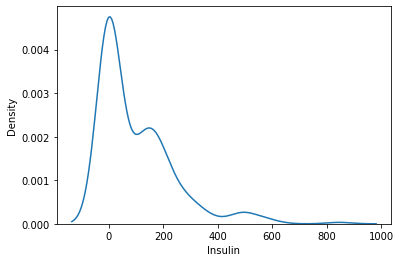

In [ ]:
  dataCpy = data[data['Outcome'] == 1]
  sns.kdeplot(dataCpy["Insulin"])

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

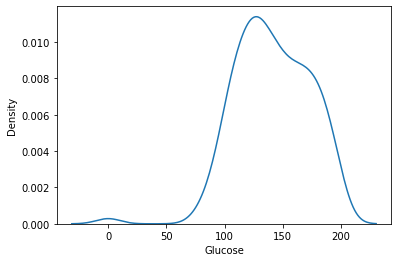

In [ ]:
  sns.kdeplot(dataCpy["Glucose"])

### Nivel de correlación entre variables 
Permite determinar hasta qué punto dos variables están relacionadas linealmente, es decir, si su valor de cambio es constante. Describe relaciones simples.  Generalmente la variable X es la independiente y la Y la dependiente. Por ejemplo, la altura generalmente determina la edad. Una mayor distancia entre dos lugares implica un mayor gasto de combustible. 
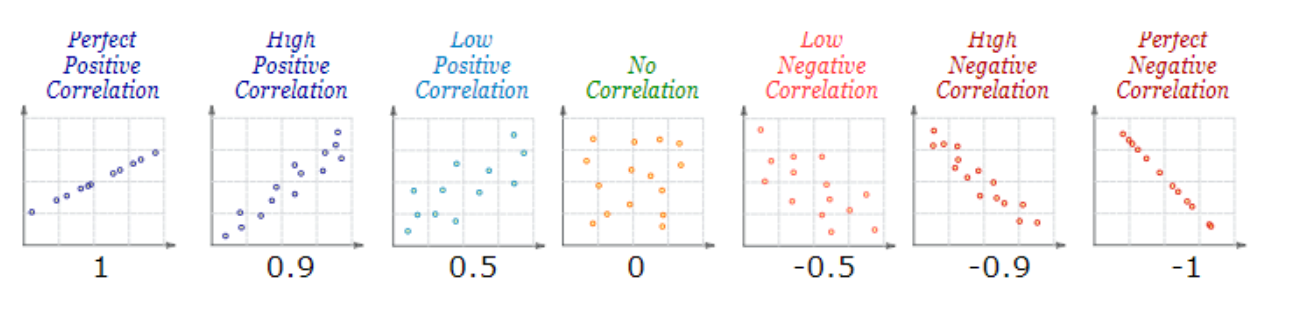



[¿Qué es la Correlación?](https://www.monografias.com/trabajos106/la-correlacion/la-correlacion)

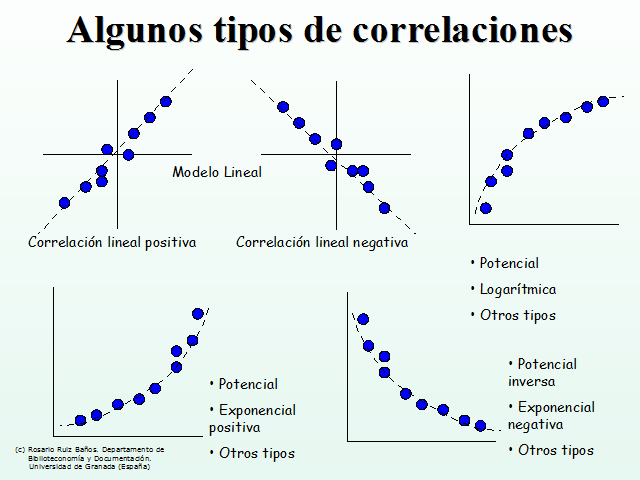

Para determinar la correlación de dos variables, usamos un gráfico de dispersión. A los extremos  del gráfico de correlación pueden observarse el uso de histogramas, para visualizar la distribución de las variables, y gráfico de distribución KDE, que brindan información respecto hacía que región se concentran más los datos. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

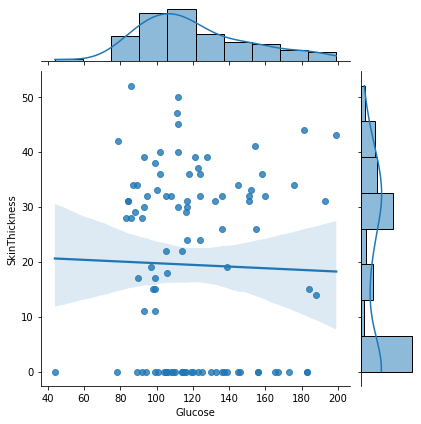

In [ ]:
plt.figure(figsize = (15,10))
sample = data.sample(100)
sns.jointplot(sample.Glucose,sample.SkinThickness,kind="reg")
plt.show()

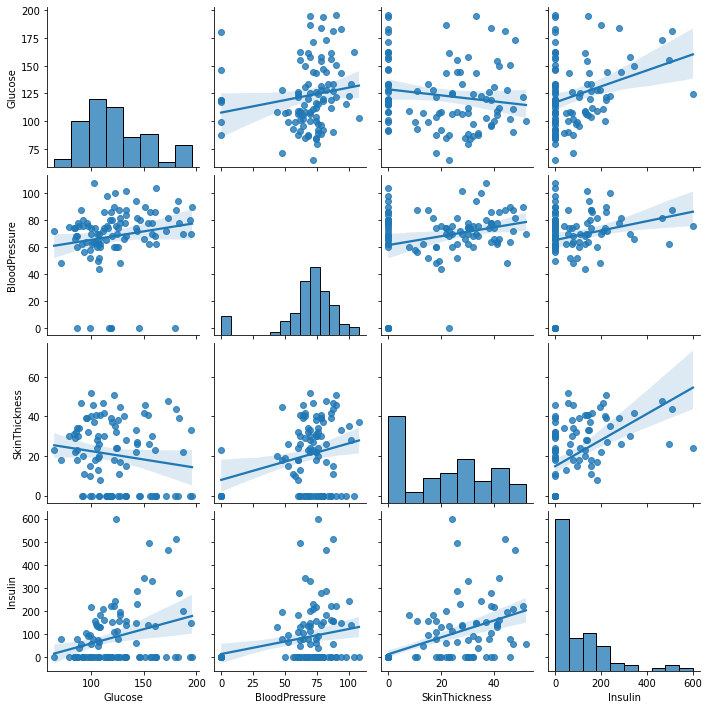

In [ ]:
ExampleData = data[['Glucose','BloodPressure','SkinThickness','Insulin']]

sns.pairplot(ExampleData.sample(n=100), kind='reg');

### Mapas de calor 
Otra forma de determinar la correlación de dos variables es a través de los mapas de calor, en estos, la correlación (negativa o positiva) se ve expresada por colores acompañados de índices desde (-1.0 a 1.0), el concepto aplicado es el mismo que en los gráficos de dispersión. 

In [ ]:
# la matriz de correlación de los valores se extrae así 
matCor = ExampleData.corr() 
matCor.head() 

,Glucose,BloodPressure,SkinThickness,Insulin
Glucose,1.000000,0.152590,0.057328,0.331357
BloodPressure,0.152590,1.000000,0.207371,0.088933
SkinThickness,0.057328,0.207371,1.000000,0.436783
Insulin,0.331357,0.088933,0.436783,1.000000


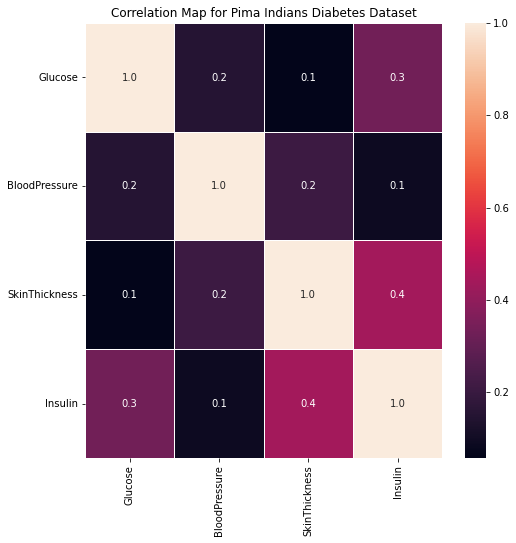

In [ ]:
f,ax=plt.subplots(figsize = (8,8))
sns.heatmap(matCor,annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map for Pima Indians Diabetes Dataset')
plt.savefig('graph.png')
plt.show()

### Otras formas de medir la correlación entre dos variables 

#### Rango de correlación de Spearman
Si existe una correlación no lineal, este tipo de técnica tiende a mejorar la definición del comportamiento entre las variables. No se ve afectada por los los puntos que presentan demasiada dispersión respecto del resto. 

In [ ]:
ranked_data = ExampleData.rank()

In [ ]:
spearman_corr = ranked_data.corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
                Glucose  BloodPressure  SkinThickness   Insulin
Glucose        1.000000       0.235191       0.060022  0.213206
BloodPressure  0.235191       1.000000       0.126486 -0.006771
SkinThickness  0.060022       0.126486       1.000000  0.541000
Insulin        0.213206      -0.006771       0.541000  1.000000


#### Correlación Pearson 
Divide la covariancia sobre el promedio de las variables. 

En Pearson se usa la siguiente fórmula para determinar el nivel de correlación ->  (cov(A,B)/(std(A)*std(B)))
(Es la forma estándar de determinar la correlación a través de df.corr())

In [ ]:
dataCpy = ExampleData.corr(method= "pearson")
print('Pearson correlation: ')
print(dataCpy)

Pearson correlation: 
                Glucose  BloodPressure  SkinThickness   Insulin
Glucose        1.000000       0.152590       0.057328  0.331357
BloodPressure  0.152590       1.000000       0.207371  0.088933
SkinThickness  0.057328       0.207371       1.000000  0.436783
Insulin        0.331357       0.088933       0.436783  1.000000


#### Covarianza 
La covarianza indica si ambas variables varían en la misma dirección (covarianza positiva) o en dirección opuesta (covarianza negativa). No hay importancia en el valor numérico de covarianza, solo el signo es útil, dado que, a nivel general, no siempre puede que exista una relación de la variable dependiente con la independiente, y la variación no sea necesariamente lineal, si no que los datos tengan otro tipo de comportamiento (exponencial, parabólico, etc.) Tanto la covarianza como la correlación permiten visualizar si los datos se pueden ajustar a un modelo de regresión o no, y a cuál en caso de sí poderse. 

In [ ]:
print("Covariance between Glucose and Insulin: ",data.Glucose.cov(data.Insulin))
print("Covariance between Glucose and SkinThickness: ",data.Glucose.cov(data.SkinThickness   ))

Covariance between Glucose and Insulin:  1220.935798973272
Covariance between Glucose and SkinThickness:  29.2391826923077


### Referencias 

* Lopez B. Distribuciones de probabilidad con Python. Matemáticas, análisis de datos y python. https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/
* The carpentries. Análisis y visualización de datos usando Python. https://datacarpentry.org/python-ecology-lesson-es/index.html  
* The carpentries. Análisis y visualización de datos usando Python: Notas de Instructor Soluciones a desafíos https://datacarpentry.org/python-ecology-lesson-es/guide/index.html
*  Stojiljković. Python Statistics Fundamentals: How to Describe Your Data. https://realpython.com/python-statistics/
* Ruiz B. La correlación. Monografías. https://www.monografias.com/trabajos106/la-correlacion/la-correlacion
* Amat R. Ajuste de distribuciones con kernel density estimation y Python. https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html